<a href="https://colab.research.google.com/github/yayunl/colab-code/blob/main/word_embeddings_from_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install Keras-Preprocessing
# Install a library called "datasets"
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 45.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [5]:
from keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer
import numpy as np

**Tokenizing the data**

In [1]:
from datasets import load_dataset
ds = load_dataset("stanfordnlp/imdb")
test_set = ds['test']
train_set = ds['train']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [2]:
train_lables = []
train_texts = []
test_lables = []
test_texts = []

for i in range(len(train_set)):
    train_lables.append(train_set[i]['label'])
    train_texts.append(train_set[i]['text'])

for i in range(len(test_set)):
    test_lables.append(test_set[i]['label'])
    test_texts.append(test_set[i]['text'])

In [6]:
# Cuts off reviews after 100 words
maxlen = 100
training_samples = 200
validation_samples = 10000
# Considers only the top 10000 words in the dataset
max_words = 10000

In [7]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)
sequences = tokenizer.texts_to_sequences(train_texts)

In [8]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [9]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(train_lables)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [10]:
# Shuffles the data
indices = np.array(np.arange(data.shape[0]))
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [11]:
# Splits the data into a training set and a validation set
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


In [12]:
x_train.shape

(200, 100)

In [13]:
# Display some data in the training set
print(x_train[0])

[  89  121   10   89  121   10   89  121   18   10   97  711 2228  744
  408   40   28 1046 2382    2 1803  405  130   77  566   20   88    4
   95  148   21  379   15    1 2921  180 2470   61  277   51  301    1
  862   37  449    8   38 2788  119   28 1046  680   69    3  114    7
    7   28   82  210    4  599  269   37 1369 3602   14    1 1251    8
 4608  142   62    2   14  348   39 1407    4    1    4 7820    2   50
  200   27    1   88 4555  442  106  281  204  123  107   35  130  237
    3 1000]


**Precessing with the GloVe word embeddings**

In [14]:
# Download the pre-trained embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2024-08-01 17:06:18--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-08-01 17:06:18--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-08-01 17:06:18--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [2]:
# Unzip the package
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [3]:
!ls
!pwd

glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
glove.6B.200d.txt  glove.6B.50d.txt   sample_data
/content


##Indexing the vectors##

In [15]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


**Fusing with google drive**

In [11]:
# !pip install --upgrade pip
# !pip install -U -q pydrive
# !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
# !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
# !apt-get update -qq 2>&1 > /dev/null

# !apt-get -y install -qq google-drive-ocamlfuse fuse

# from google.colab import auth
# auth.authenticate_user()
# # Generate creds for the Drive FUSE library.
# from oauth2client.client import GoogleCredentials
# creds = GoogleCredentials.get_application_default()
# import getpass
# !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
# vcode = getpass.getpass()
# !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

# !mkdir -p drive
# !google-drive-ocamlfuse drive

In [10]:
#import pickle
#pickle.dump({'embeddings_index' : embeddings_index } , open('/content', 'wb'))

**Preparing the GloVe word-embeddings matrix**

In [16]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

**Defining the model**

In [17]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [18]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1320065 (5.04 MB)
Trainable params: 1320065 (5.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Loading the GloVe embeddings in the model**

In [19]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [20]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [21]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 3s 159ms/step - loss: 1.5826 - acc: 0.5400 - val_loss: 0.6936 - val_acc: 0.4957
Epoch 2/10
7/7 [==============================] - 1s 221ms/step - loss: 0.6428 - acc: 0.5600 - val_loss: 2.0365 - val_acc: 0.4958
Epoch 3/10
7/7 [==============================] - 1s 122ms/step - loss: 0.7818 - acc: 0.6550 - val_loss: 0.6973 - val_acc: 0.5355
Epoch 4/10
7/7 [==============================] - 1s 119ms/step - loss: 0.4023 - acc: 0.8300 - val_loss: 0.7792 - val_acc: 0.5128
Epoch 5/10
7/7 [==============================] - 1s 219ms/step - loss: 0.3357 - acc: 0.8700 - val_loss: 0.7026 - val_acc: 0.5528
Epoch 6/10
7/7 [==============================] - 1s 113ms/step - loss: 0.1761 - acc: 0.9850 - val_loss: 0.7293 - val_acc: 0.5545
Epoch 7/10
7/7 [==============================] - 1s 220ms/step - loss: 0.4880 - acc: 0.7800 - val_loss: 0.8335 - val_acc: 0.5223
Epoch 8/10
7/7 [==============================] - 1s 224ms/step - loss: 0.0835 - acc: 1.00

In [22]:
# Save the weights
model.save_weights('pre_trained_glove_model.h5')

**Plotting the results**

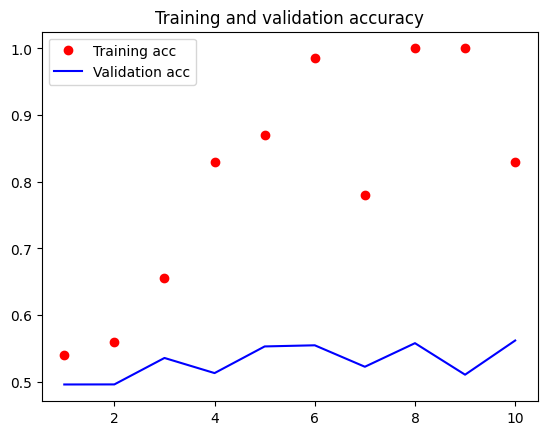

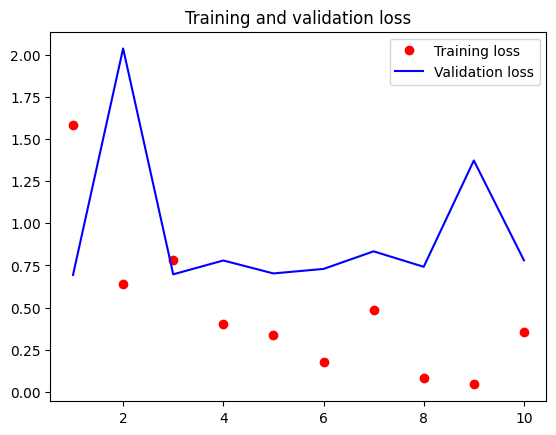

In [24]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Evlauting the model on the test data**

In [25]:
sequences = tokenizer.texts_to_sequences(test_texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(test_lables)
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 5s 7ms/step - loss: 0.7836 - acc: 0.5625


[0.7836182117462158, 0.5625200271606445]